# **Assignment task: Find the best neural network model for the count of rental bikes prediction (assignment submission)**
Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model. Suggestions:
- Try adding interaction features (e.g., `hr * workingday`, `weathersit * hum`).
- Tune NN hyperparameters (layers, neurons, learning rate) via `GridSearchCV`.
- Consider more advanced architectures (e.g., gradient boosting, LSTMs for temporal structure).

In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sympy.printing.tensorflow import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

%matplotlib inline


In [37]:
# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7BikeSharing.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.


In [39]:

target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
def build_nn(units_list=(64, 64), dropout_rate=0.0, lr=0.01, input_dim=None):
    assert input_dim is not None, "input_dim must not be None"
    model = Sequential()

    model.add(Dense(units_list[0], activation='relu', input_shape=(input_dim,)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    for u in units_list[1:]:
        model.add(Dense(u, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=lr), loss='mae')
    return model


In [42]:
def get_callbacks(path):
    return [
        EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1),
        ModelCheckpoint(path, monitor='val_loss', save_best_only=True, verbose=1)
    ]


In [45]:
search_units = [
    (128, 64),
    (64, 128),
]
fixed_dropout = 0.0
search_lr = [1e-3, 1e-2]
fixed_batch_size = 32
max_epochs = 100
best_cfg = None
best_val_mae = np.inf
best_model_path = 'best_assignment_model.keras'
best_hist = None

for units in search_units:
    for lr in search_lr:
        K.clear_session()
        model = build_nn(
            units_list=units,
            dropout_rate=fixed_dropout,
            lr=lr,
            input_dim=X_train_scaled.shape[1]
        )
        history = model.fit(
            X_train_scaled, y_train,
            validation_split=0.2,
            epochs=max_epochs,
            batch_size=fixed_batch_size,
            callbacks=get_callbacks(best_model_path),
            verbose=0
        )
        cur_best_val = min(history.history['val_loss'])
        if cur_best_val < best_val_mae:
            best_val_mae = cur_best_val
            best_cfg = {
                "units_list": units,
                "dropout_rate": fixed_dropout,
                "learning_rate": lr,
                "batch_size": fixed_batch_size,
                "best_val_mae": float(best_val_mae)
            }
            best_hist = history

print("Best validation MAE config:", best_cfg)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 98.67579, saving model to best_assignment_model.keras

Epoch 2: val_loss improved from 98.67579 to 97.17464, saving model to best_assignment_model.keras

Epoch 3: val_loss improved from 97.17464 to 95.37312, saving model to best_assignment_model.keras

Epoch 4: val_loss improved from 95.37312 to 92.75461, saving model to best_assignment_model.keras

Epoch 5: val_loss improved from 92.75461 to 89.66820, saving model to best_assignment_model.keras

Epoch 6: val_loss improved from 89.66820 to 86.57408, saving model to best_assignment_model.keras

Epoch 7: val_loss improved from 86.57408 to 82.57671, saving model to best_assignment_model.keras

Epoch 8: val_loss improved from 82.57671 to 78.77354, saving model to best_assignment_model.keras

Epoch 9: val_loss improved from 78.77354 to 74.54457, saving model to best_assignment_model.keras

Epoch 10: val_loss improved from 74.54457 to 70.36847, saving model to best_assignment_model.keras

Epoch 11: val

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 83.03445, saving model to best_assignment_model.keras

Epoch 2: val_loss improved from 83.03445 to 67.77391, saving model to best_assignment_model.keras

Epoch 3: val_loss improved from 67.77391 to 62.44433, saving model to best_assignment_model.keras

Epoch 4: val_loss improved from 62.44433 to 55.87298, saving model to best_assignment_model.keras

Epoch 5: val_loss improved from 55.87298 to 48.73124, saving model to best_assignment_model.keras

Epoch 6: val_loss improved from 48.73124 to 47.46948, saving model to best_assignment_model.keras

Epoch 7: val_loss improved from 47.46948 to 42.92853, saving model to best_assignment_model.keras

Epoch 8: val_loss improved from 42.92853 to 39.79353, saving model to best_assignment_model.keras

Epoch 9: val_loss improved from 39.79353 to 39.20081, saving model to best_assignment_model.keras

Epoch 10: val_loss improved from 39.20081 to 36.45580, saving model to best_assignment_model.keras

Epoch 11: val

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 99.72965, saving model to best_assignment_model.keras

Epoch 2: val_loss improved from 99.72965 to 97.30876, saving model to best_assignment_model.keras

Epoch 3: val_loss improved from 97.30876 to 94.40221, saving model to best_assignment_model.keras

Epoch 4: val_loss improved from 94.40221 to 91.15818, saving model to best_assignment_model.keras

Epoch 5: val_loss improved from 91.15818 to 88.25958, saving model to best_assignment_model.keras

Epoch 6: val_loss improved from 88.25958 to 85.22157, saving model to best_assignment_model.keras

Epoch 7: val_loss improved from 85.22157 to 82.31179, saving model to best_assignment_model.keras

Epoch 8: val_loss improved from 82.31179 to 79.24801, saving model to best_assignment_model.keras

Epoch 9: val_loss improved from 79.24801 to 76.93276, saving model to best_assignment_model.keras

Epoch 10: val_loss improved from 76.93276 to 74.91536, saving model to best_assignment_model.keras

Epoch 11: val

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 83.86309, saving model to best_assignment_model.keras

Epoch 2: val_loss improved from 83.86309 to 74.46243, saving model to best_assignment_model.keras

Epoch 3: val_loss improved from 74.46243 to 66.55899, saving model to best_assignment_model.keras

Epoch 4: val_loss improved from 66.55899 to 63.07843, saving model to best_assignment_model.keras

Epoch 5: val_loss improved from 63.07843 to 60.38322, saving model to best_assignment_model.keras

Epoch 6: val_loss improved from 60.38322 to 55.70028, saving model to best_assignment_model.keras

Epoch 7: val_loss improved from 55.70028 to 47.70300, saving model to best_assignment_model.keras

Epoch 8: val_loss improved from 47.70300 to 44.91839, saving model to best_assignment_model.keras

Epoch 9: val_loss improved from 44.91839 to 42.72475, saving model to best_assignment_model.keras

Epoch 10: val_loss improved from 42.72475 to 38.69454, saving model to best_assignment_model.keras

Epoch 11: val

In [47]:
best_model = load_model(best_model_path)
y_pred_best = best_model.predict(X_test_scaled)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5
r2_best = r2_score(y_test, y_pred_best)

print({"BestTest_MAE": mae_best, "BestTest_RMSE": rmse_best, "BestTest_R2": r2_best})


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
{'BestTest_MAE': 24.75702448832289, 'BestTest_RMSE': 41.412952540635715, 'BestTest_R2': 0.9458389275316815}


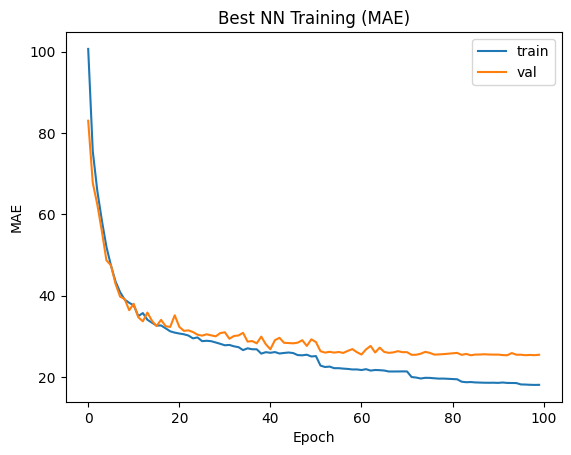

Best NN config: {'units_list': (128, 64), 'dropout_rate': 0.0, 'learning_rate': 0.01, 'batch_size': 32, 'best_val_mae': 25.379974365234375}


In [48]:

plt.figure()
plt.plot(best_hist.history['loss'], label='train')
plt.plot(best_hist.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Best NN Training (MAE)')
plt.legend()
plt.show()

print("Best NN config:", best_cfg)



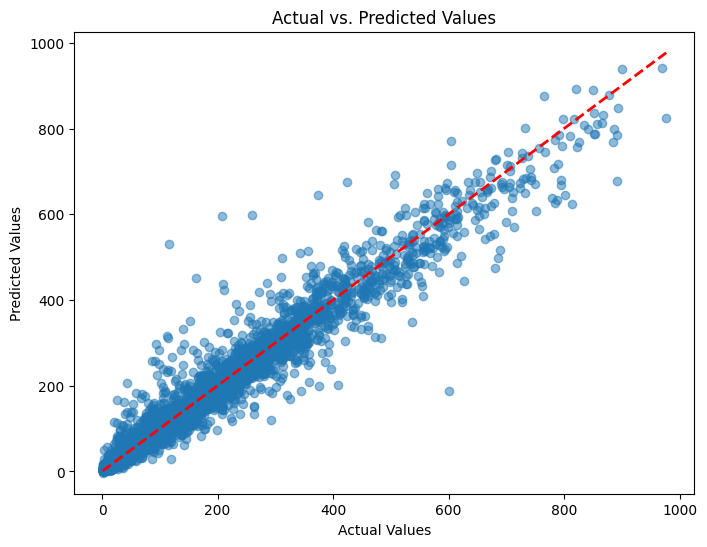

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         linestyle='--', color='red', lw=2)

plt.show()
